___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Import Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (9,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.duplicated().sum().sum()


0

In [8]:
df = df.drop(["RowNumber","CustomerId","Surname"], axis=1)
# We don't need this columns for feature engineering. They don't provide us any insight.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [10]:
df["Exited"].value_counts()
# We can say this is an unbalanced data

0    7963
1    2037
Name: Exited, dtype: int64

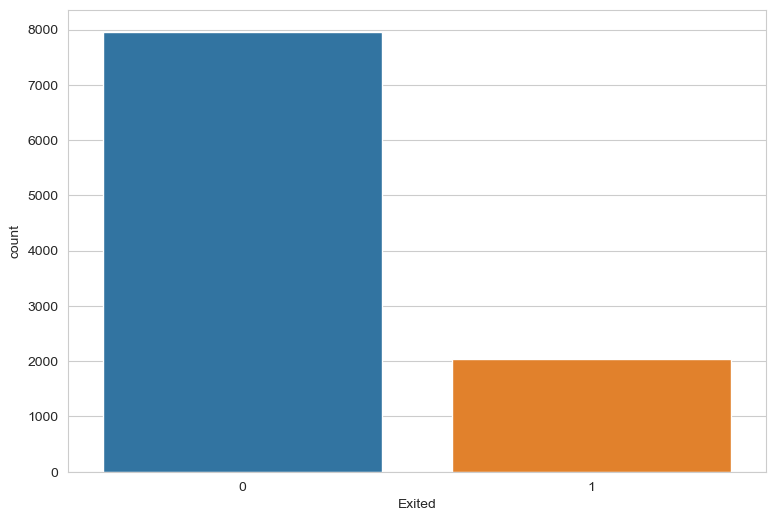

In [11]:
sns.countplot(df["Exited"]);

In [12]:
col = ["Geography","Gender","Tenure","NumOfProducts","HasCrCard","IsActiveMember"]
for i in col:
    print(i.upper())
    print(df[i].value_counts())
    print("---"*12)

GEOGRAPHY
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
------------------------------------
GENDER
Male      5457
Female    4543
Name: Gender, dtype: int64
------------------------------------
TENURE
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
------------------------------------
NUMOFPRODUCTS
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
------------------------------------
HASCRCARD
1    7055
0    2945
Name: HasCrCard, dtype: int64
------------------------------------
ISACTIVEMEMBER
1    5151
0    4849
Name: IsActiveMember, dtype: int64
------------------------------------


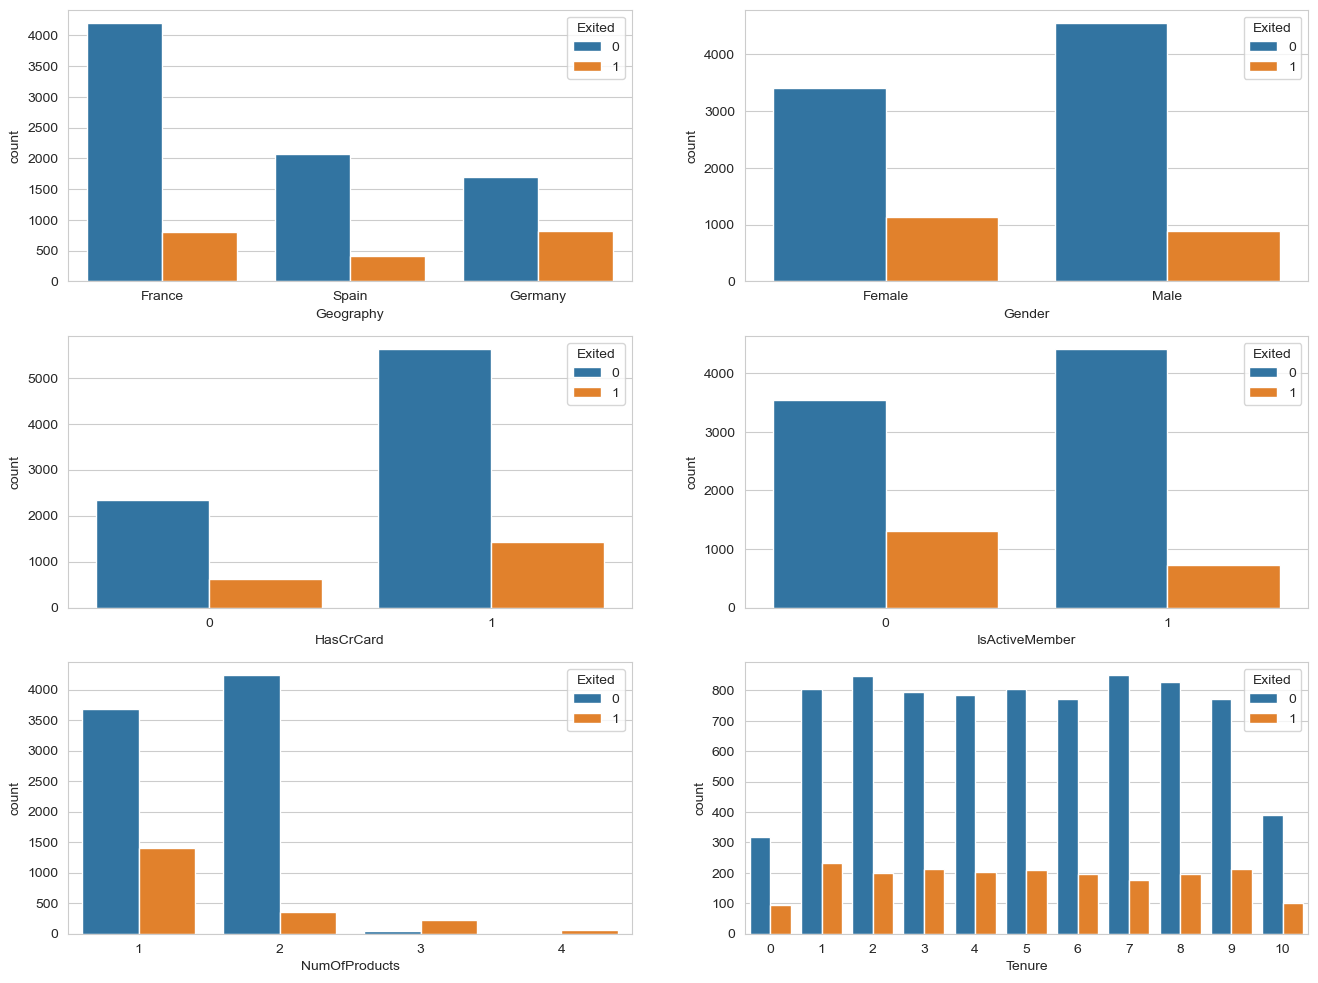

In [13]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=ax[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=ax[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=ax[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=ax[1][1]);
sns.countplot(x='NumOfProducts', hue = 'Exited',data = df, ax=ax[2][0])
sns.countplot(x='Tenure', hue = 'Exited',data = df, ax=ax[2][1]);

These graphs shows:
  The France has far the most number of customers.
  Proportion of the churning female customers is bigger than that of male ones.
  The most of the churning customers are inactive members.
  The customers having more than one products are loyal customers.

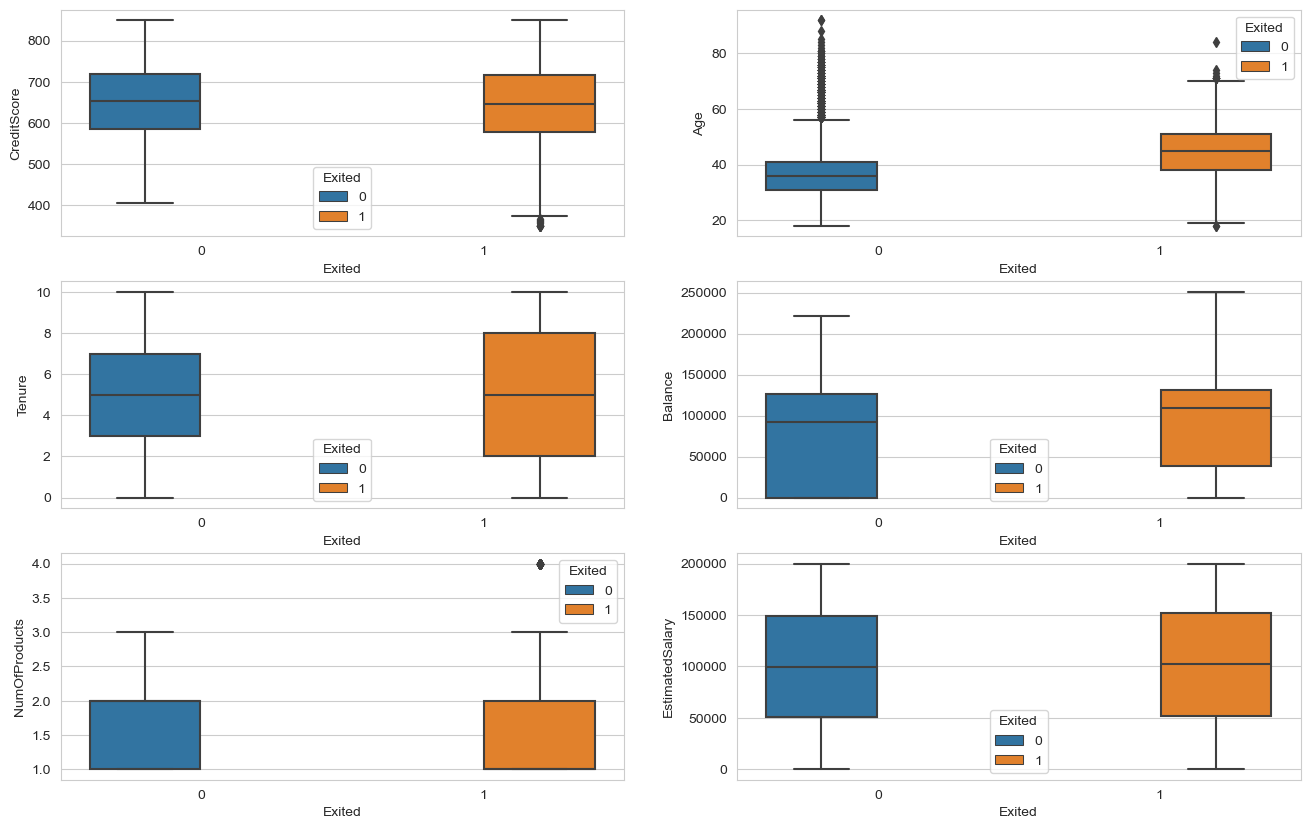

In [14]:
fig, ax = plt.subplots(3, 2, figsize=(16, 10))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=ax[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=ax[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=ax[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=ax[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=ax[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=ax[2][1]);

There is no significant effect of credit score distribution on churning.
There are more older customers who churn than the younger ones.
The customers over 40 have tendency to churn.

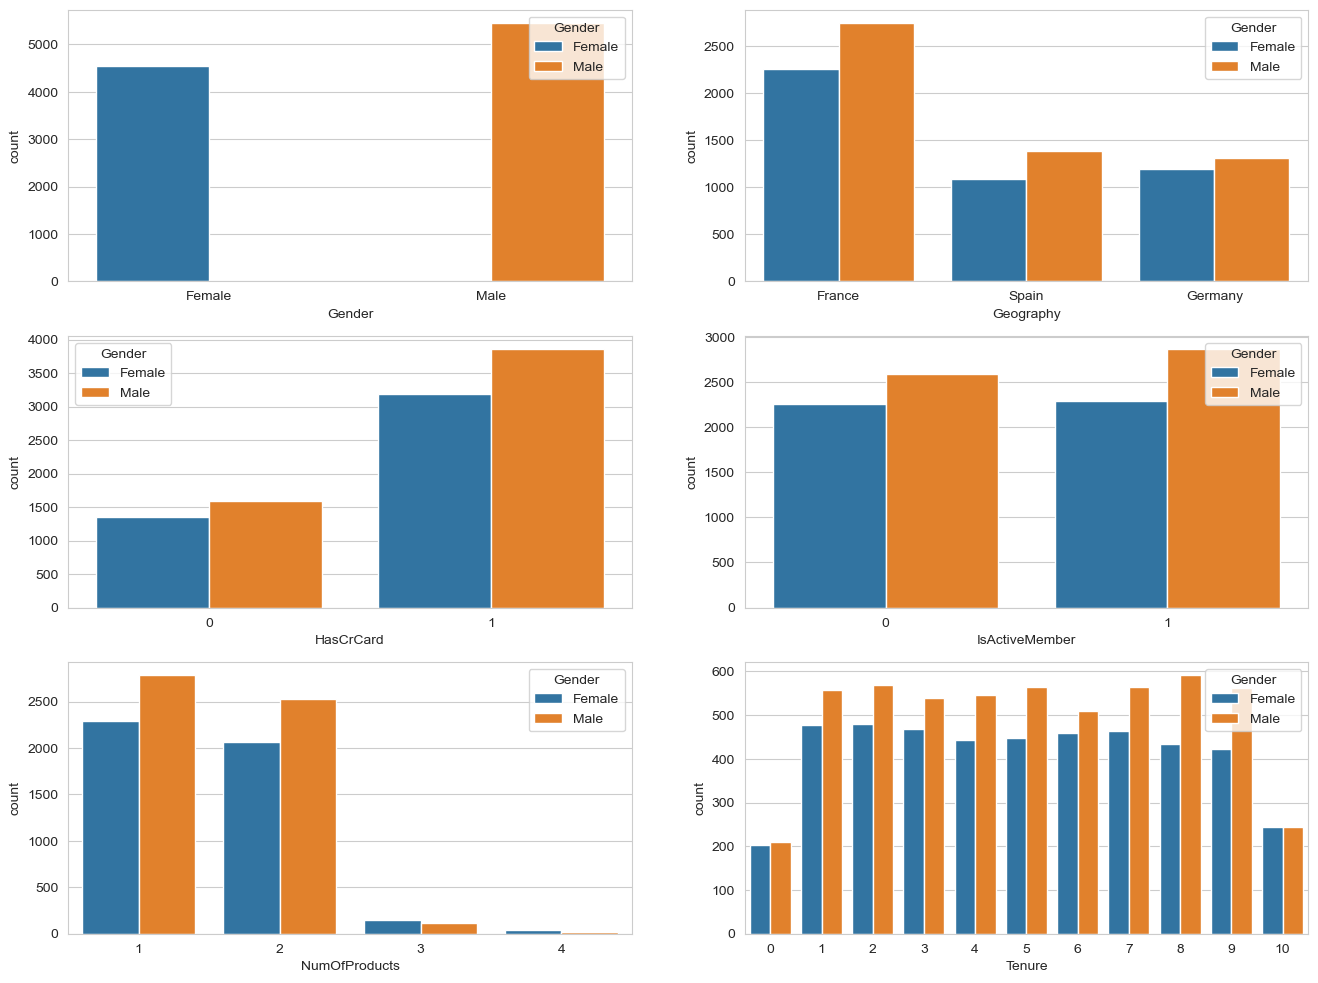

In [15]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
sns.countplot(x='Gender', hue = 'Gender',data = df, ax=ax[0][0])
sns.countplot(x='Geography', hue = 'Gender',data = df, ax=ax[0][1])
sns.countplot(x='HasCrCard', hue = 'Gender',data = df, ax=ax[1][0])
sns.countplot(x='IsActiveMember', hue = 'Gender',data = df, ax=ax[1][1]);
sns.countplot(x='NumOfProducts', hue = 'Gender',data = df, ax=ax[2][0])
sns.countplot(x='Tenure', hue = 'Gender',data = df, ax=ax[2][1]);

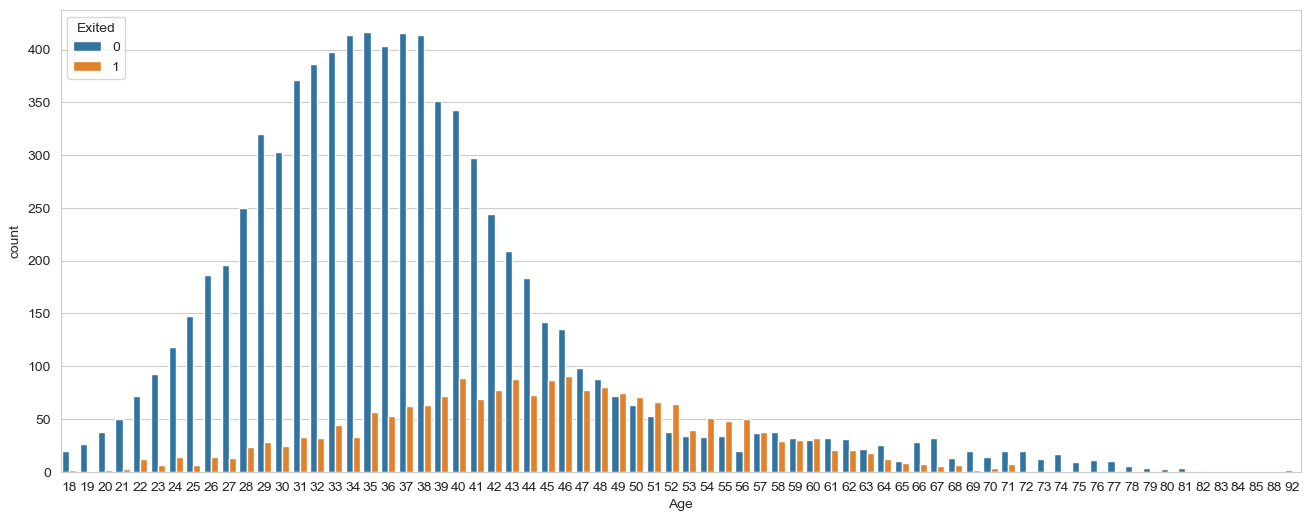

In [16]:
plt.figure(figsize = (16, 6))
sns.countplot(x="Age", hue="Exited", data=df);

The customers are especially between 36-52 have tendency to churn.

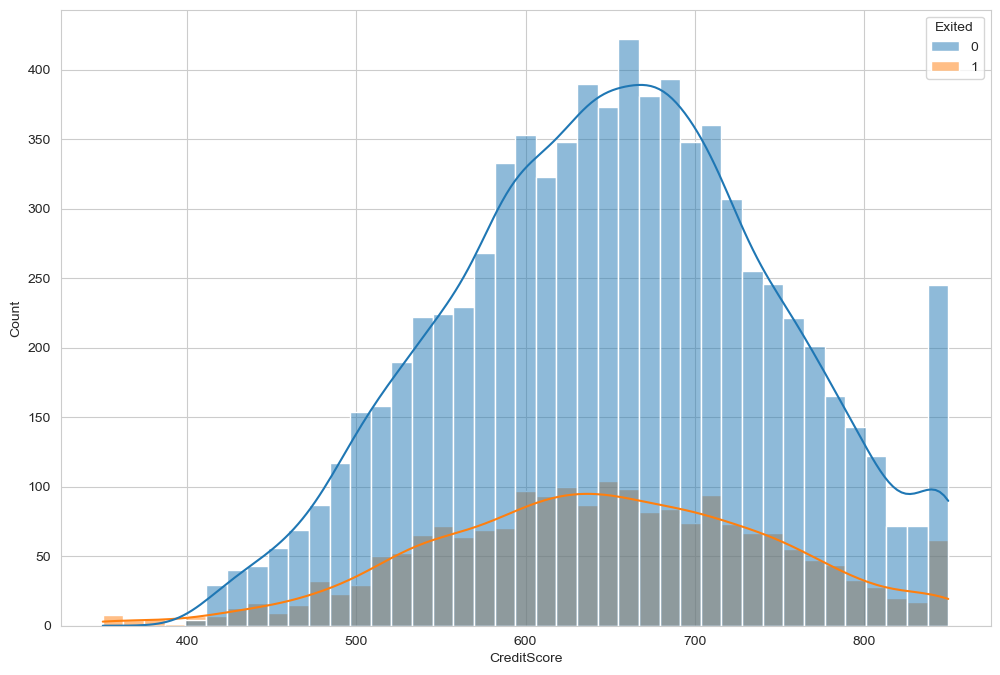

In [17]:
plt.figure(figsize = (12, 8))
sns.histplot(x="CreditScore", data=df,kde = True, hue = "Exited");

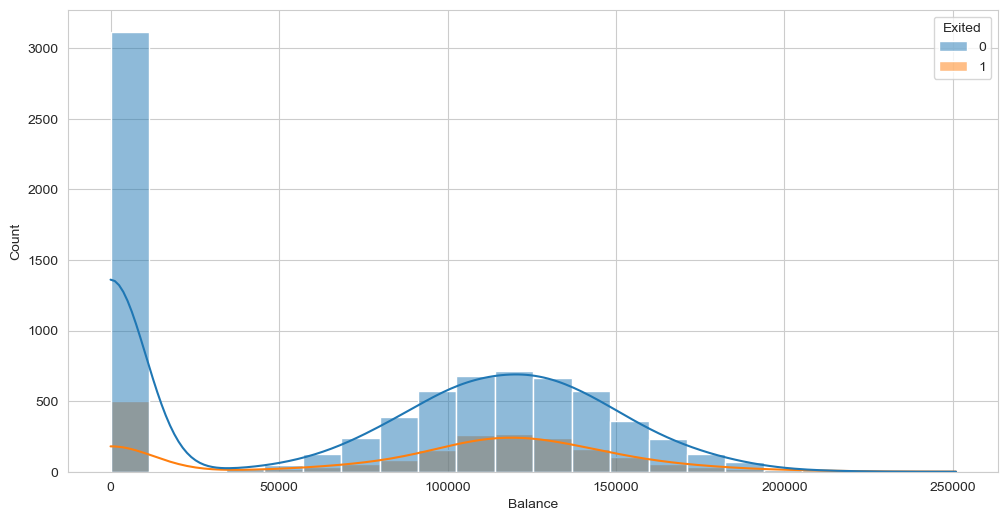

In [18]:
plt.figure(figsize = (12, 6))
sns.histplot(x="Balance", data=df, hue = "Exited", kde = True);

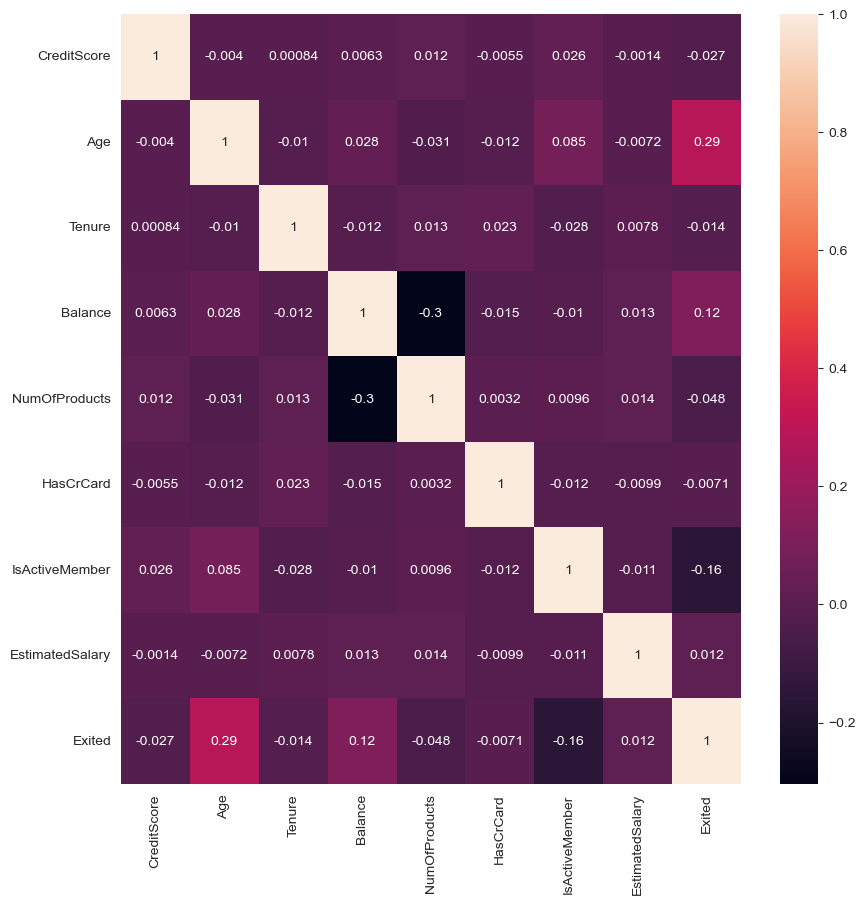

In [19]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True);

Almost there is no multilinearity between the features.

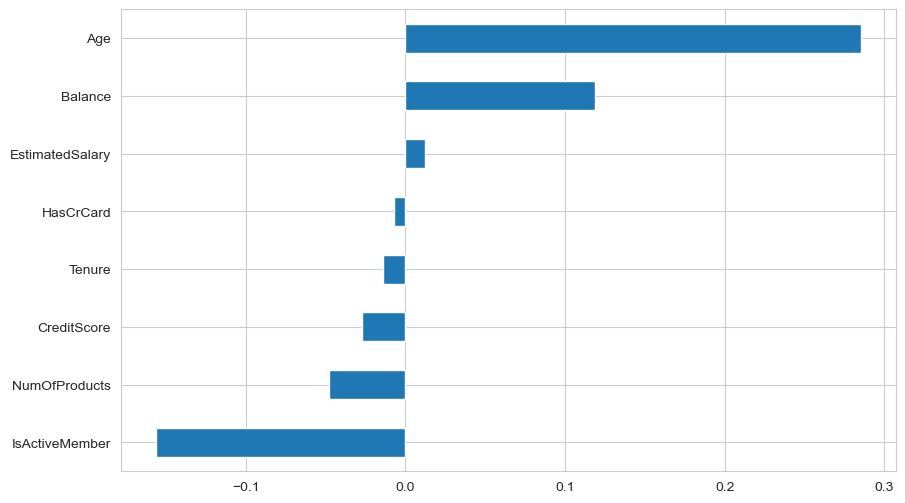

In [20]:
plt.figure(figsize = (10,6))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

# Preprocessing of Data
- Train | Test Split, Scalling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [22]:
seed=42

In [23]:
df = pd.get_dummies(df, drop_first=True)

In [24]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 42)


In [25]:
X_train.shape

(8000, 11)

In [26]:
X_test.shape

(2000, 11)

# Modelling & Model Performance

In [29]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.metrics import Accuracy, Recall,Precision
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from tensorflow.keras.optimizers import Adam, SGD,RMSprop
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping

## without class_weigth

### Create The Model

In [30]:
tf.random.set_seed(seed)
model = Sequential()

model.add(Dense(32, activation = "relu",input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [31]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 500, verbose = 1)

Epoch 1/500
113/113 [==============================] - 2s 6ms/step - loss: 1443.0752 - recall: 0.3112 - val_loss: 30.0515 - val_recall: 0.3882
Epoch 2/500
113/113 [==============================] - 0s 3ms/step - loss: 21.2488 - recall: 0.1982 - val_loss: 10.8056 - val_recall: 0.1579
Epoch 3/500
113/113 [==============================] - 0s 3ms/step - loss: 12.8129 - recall: 0.2124 - val_loss: 13.5539 - val_recall: 0.1053
Epoch 4/500
113/113 [==============================] - 0s 3ms/step - loss: 11.2280 - recall: 0.2097 - val_loss: 8.3293 - val_recall: 0.3684
Epoch 5/500
113/113 [==============================] - 0s 3ms/step - loss: 10.2944 - recall: 0.2152 - val_loss: 15.3495 - val_recall: 0.0132
Epoch 6/500
113/113 [==============================] - 0s 3ms/step - loss: 11.1087 - recall: 0.2307 - val_loss: 7.7389 - val_recall: 0.3750
Epoch 7/500
113/113 [==============================] - 0s 3ms/step - loss: 14.3655 - recall: 0.2138 - val_loss: 6.7350 - val_recall: 0.3487
Epoch 8/500
11

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [33]:
model.history.history

{'loss': [1443.0751953125,
  21.248767852783203,
  12.812853813171387,
  11.228049278259277,
  10.294388771057129,
  11.108695983886719,
  14.36548137664795,
  11.967010498046875,
  10.279214859008789,
  10.58910846710205,
  11.440180778503418,
  10.318598747253418,
  15.073992729187012,
  8.762531280517578,
  7.798957347869873,
  9.938981056213379,
  10.243867874145508,
  9.356295585632324,
  13.276493072509766,
  8.383275985717773,
  11.516977310180664,
  12.698838233947754,
  8.933832168579102,
  7.015482425689697,
  9.503087997436523,
  8.199981689453125,
  8.602266311645508,
  7.659309387207031,
  6.5741705894470215,
  7.562573432922363,
  6.7129034996032715,
  7.890710830688477,
  10.232595443725586,
  9.642070770263672,
  7.430992603302002,
  6.698819637298584,
  9.015666007995605,
  5.769969463348389,
  7.176721572875977,
  6.399608135223389,
  5.9533891677856445,
  7.003573894500732,
  8.332781791687012,
  4.564700126647949,
  8.599570274353027,
  5.232929706573486,
  3.954320

In [34]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,1443.075,0.311,30.052,0.388
1,21.249,0.198,10.806,0.158
2,12.813,0.212,13.554,0.105
3,11.228,0.210,8.329,0.368
4,10.294,0.215,15.350,0.013


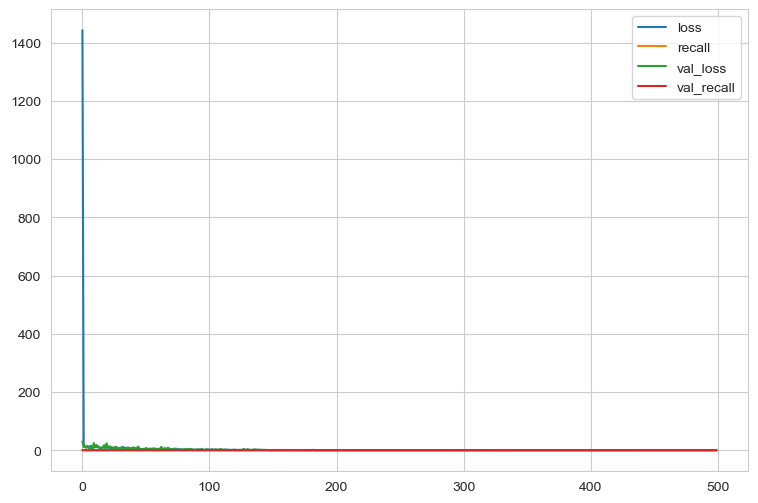

In [35]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

???????????????????

In [36]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1593    0]
 [ 407    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



63/63 [==============================] - 0s 2ms/step


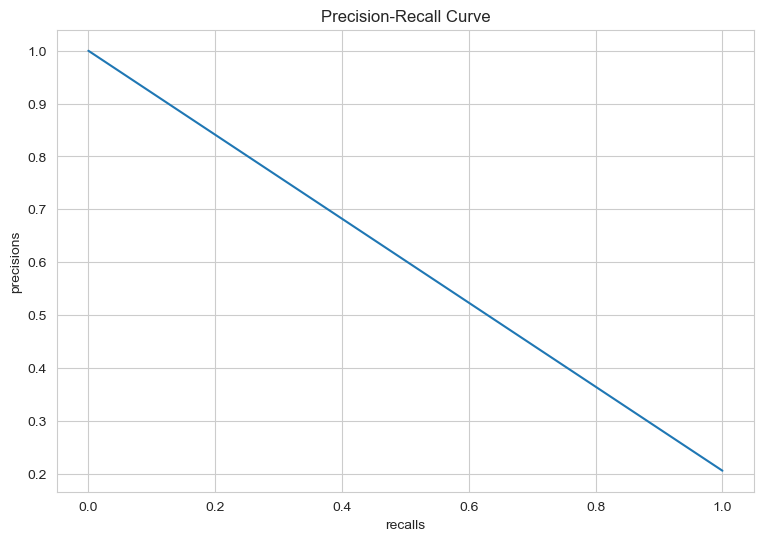

In [39]:
y_pred_proba = model.predict(X_test)
precisions, recalls, tresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall Curve')
plt.show()

In [40]:
model.evaluate(X_test, y_test, verbose=0)

[0.5031549334526062, 0.0]

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [41]:
from sklearn.utils import class_weight

In [42]:
tf.random.set_seed(seed)
model = Sequential()

model.add(Dense(32, activation = "relu",input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [43]:
class_weights = class_weight.compute_class_weight( 'balanced', classes=np.unique(y_train),  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [50]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 500, verbose = 1, class_weight = class_weights)

Epoch 1/500
113/113 [==============================] - 1s 5ms/step - loss: 0.6951 - recall: 1.0000 - val_loss: 0.6977 - val_recall: 1.0000
Epoch 2/500
113/113 [==============================] - 1s 5ms/step - loss: 0.6951 - recall: 1.0000 - val_loss: 0.6965 - val_recall: 1.0000
Epoch 3/500
113/113 [==============================] - 1s 5ms/step - loss: 0.6951 - recall: 1.0000 - val_loss: 0.6965 - val_recall: 1.0000
Epoch 4/500
113/113 [==============================] - 1s 4ms/step - loss: 0.6951 - recall: 1.0000 - val_loss: 0.6977 - val_recall: 1.0000
Epoch 5/500
113/113 [==============================] - 0s 4ms/step - loss: 0.6951 - recall: 1.0000 - val_loss: 0.6963 - val_recall: 1.0000
Epoch 6/500
113/113 [==============================] - 0s 4ms/step - loss: 0.6951 - recall: 1.0000 - val_loss: 0.6959 - val_recall: 1.0000
Epoch 7/500
113/113 [==============================] - 0s 4ms/step - loss: 0.6951 - recall: 1.0000 - val_loss: 0.6953 - val_recall: 1.0000
Epoch 8/500
113/113 [======

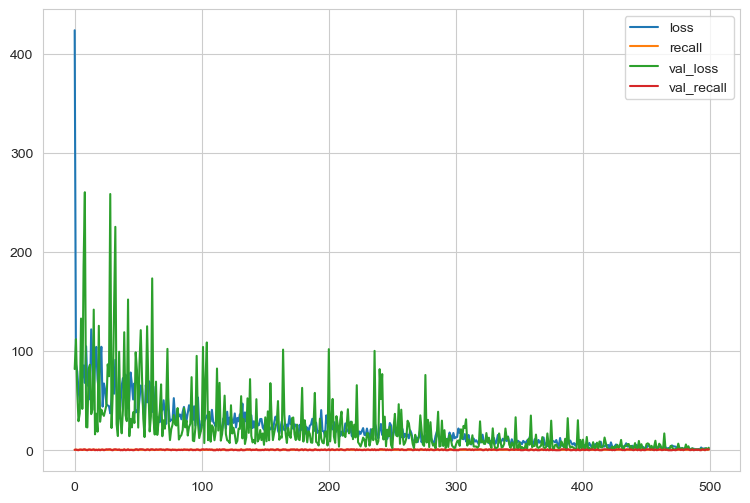

In [45]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

63/63 [==============================] - 0s 2ms/step


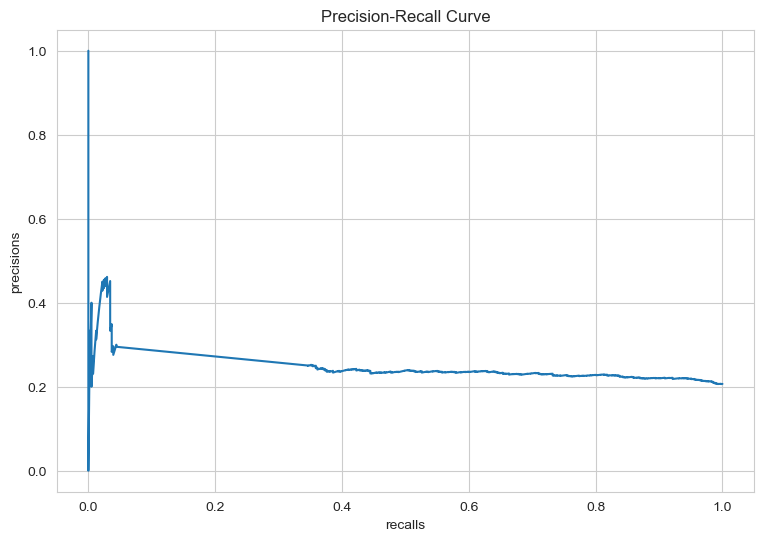

In [81]:
y_pred_proba = model.predict(X_test)
precisions, recalls, tresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall Curve')
plt.show()

:))))))) I tried to draw the LOVE 

In [47]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 3ms/step
[[ 117 1476]
 [  10  397]]
              precision    recall  f1-score   support

           0       0.92      0.07      0.14      1593
           1       0.21      0.98      0.35       407

    accuracy                           0.26      2000
   macro avg       0.57      0.52      0.24      2000
weighted avg       0.78      0.26      0.18      2000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [48]:
tf.random.set_seed(seed)
model = Sequential()

model.add(Dense(32, activation = "relu",input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(lr=0.005)

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [49]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 500, verbose = 1, class_weight = class_weights)

Epoch 1/500
57/57 [==============================] - 2s 13ms/step - loss: 171.2878 - recall: 0.3451 - val_loss: 3.8658 - val_recall: 0.0987
Epoch 2/500
57/57 [==============================] - 0s 6ms/step - loss: 4.8331 - recall: 0.1394 - val_loss: 4.1228 - val_recall: 0.1250
Epoch 3/500
57/57 [==============================] - 0s 6ms/step - loss: 3.3582 - recall: 0.1076 - val_loss: 2.3573 - val_recall: 0.0855
Epoch 4/500
57/57 [==============================] - 0s 6ms/step - loss: 2.5721 - recall: 0.0758 - val_loss: 3.4829 - val_recall: 0.0789
Epoch 5/500
57/57 [==============================] - 0s 9ms/step - loss: 1.1879 - recall: 0.0298 - val_loss: 0.6879 - val_recall: 0.0000e+00
Epoch 6/500
57/57 [==============================] - 0s 6ms/step - loss: 0.6959 - recall: 0.0000e+00 - val_loss: 0.6890 - val_recall: 0.0000e+00
Epoch 7/500
57/57 [==============================] - 0s 5ms/step - loss: 0.6957 - recall: 0.0000e+00 - val_loss: 0.6897 - val_recall: 0.0000e+00
Epoch 8/500
57/57 

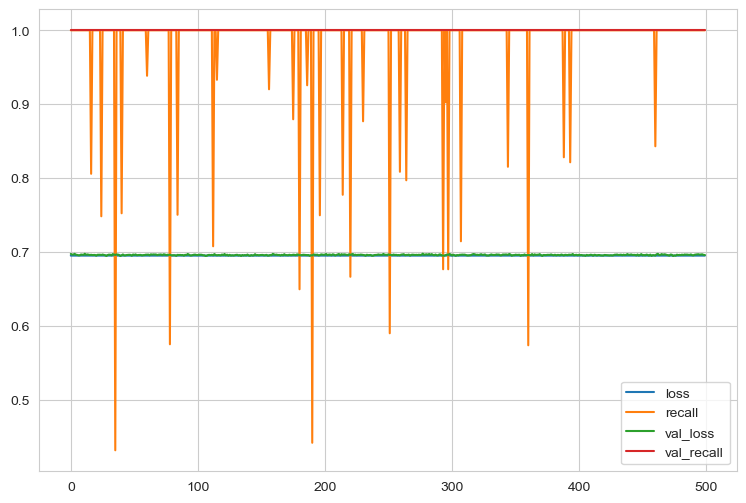

In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [53]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[   0 1593]
 [   0  407]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1593
           1       0.20      1.00      0.34       407

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.17      2000
weighted avg       0.04      0.20      0.07      2000



### Add Dropout Layer

In [55]:
from tensorflow.keras.layers import Dropout

In [58]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [59]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 500, class_weight = class_weights)

Epoch 1/500
113/113 [==============================] - 2s 8ms/step - loss: 2633.9414 - recall: 0.6928 - val_loss: 21.3946 - val_recall: 1.0000
Epoch 2/500
113/113 [==============================] - 0s 4ms/step - loss: 95.0490 - recall: 0.8532 - val_loss: 1.1795 - val_recall: 1.0000
Epoch 3/500
113/113 [==============================] - 0s 4ms/step - loss: 31.4204 - recall: 0.8816 - val_loss: 1.6486 - val_recall: 1.0000
Epoch 4/500
113/113 [==============================] - 0s 4ms/step - loss: 15.9921 - recall: 0.8924 - val_loss: 1.7283 - val_recall: 1.0000
Epoch 5/500
113/113 [==============================] - 0s 4ms/step - loss: 11.0910 - recall: 0.3234 - val_loss: 0.6846 - val_recall: 0.0000e+00
Epoch 6/500
113/113 [==============================] - 0s 4ms/step - loss: 8.7951 - recall: 0.0947 - val_loss: 0.6722 - val_recall: 0.0000e+00
Epoch 7/500
113/113 [==============================] - 0s 4ms/step - loss: 6.1895 - recall: 0.5074 - val_loss: 0.7134 - val_recall: 0.2829
Epoch 8/500

<AxesSubplot:>

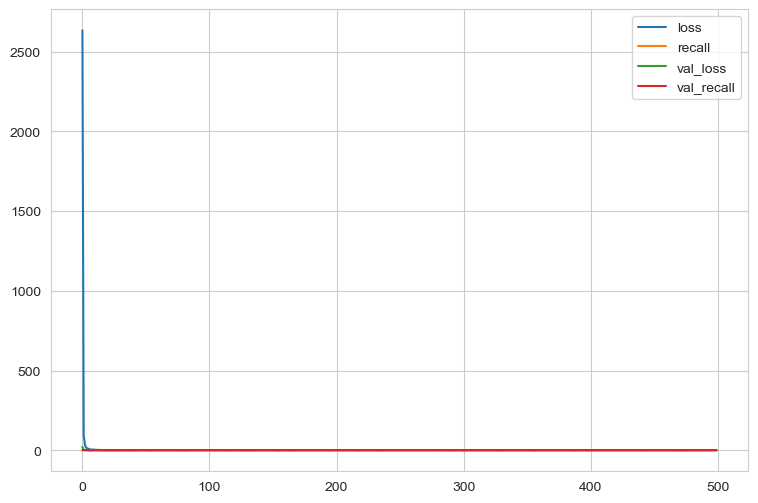

In [60]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [67]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 3ms/step
[[1593    0]
 [ 407    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [68]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [69]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 50, restore_best_weights = True)

In [70]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 500, verbose = 1,
          callbacks = [early_stop], class_weight = class_weights)

Epoch 1/500
113/113 [==============================] - 2s 6ms/step - loss: 739.3423 - recall: 0.3647 - val_loss: 0.8206 - val_recall: 0.1447
Epoch 2/500
113/113 [==============================] - 0s 3ms/step - loss: 30.7779 - recall: 0.2903 - val_loss: 0.6088 - val_recall: 0.0000e+00
Epoch 3/500
113/113 [==============================] - 0s 3ms/step - loss: 14.8501 - recall: 0.2706 - val_loss: 1.0431 - val_recall: 0.7632
Epoch 4/500
113/113 [==============================] - 0s 4ms/step - loss: 8.3565 - recall: 0.2686 - val_loss: 1.5107 - val_recall: 0.0000e+00
Epoch 5/500
113/113 [==============================] - 1s 4ms/step - loss: 3.9292 - recall: 0.2483 - val_loss: 0.5564 - val_recall: 0.0000e+00
Epoch 6/500
113/113 [==============================] - 1s 5ms/step - loss: 2.6108 - recall: 0.1712 - val_loss: 0.6158 - val_recall: 0.0000e+00
Epoch 7/500
113/113 [==============================] - 0s 3ms/step - loss: 2.2122 - recall: 0.0988 - val_loss: 0.6684 - val_recall: 0.0000e+00
Epo

<AxesSubplot:>

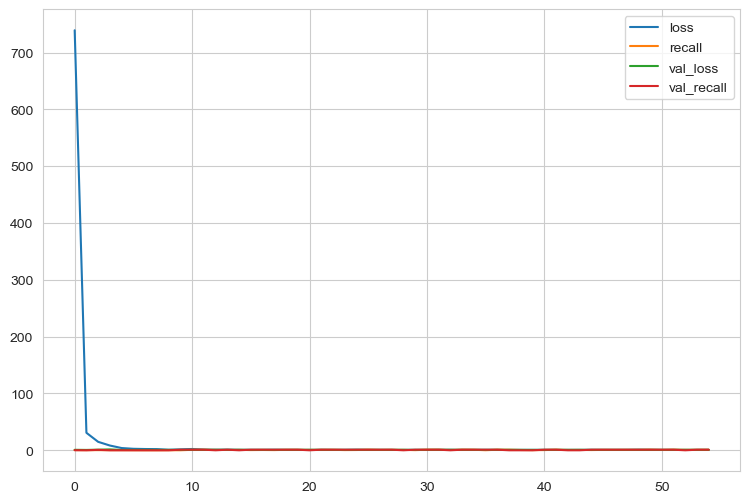

In [71]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [72]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1593    0]
 [ 407    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



#### Monitor the "val_recall" as metric

In [73]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [74]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 50, restore_best_weights = True)

In [75]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 500, verbose = 1,
          callbacks = [early_stop], class_weight = class_weights)

Epoch 1/500
113/113 [==============================] - 2s 9ms/step - loss: 707.3420 - recall: 0.4371 - val_loss: 2.3992 - val_recall: 0.1316
Epoch 2/500
113/113 [==============================] - 1s 5ms/step - loss: 22.3512 - recall: 0.2720 - val_loss: 0.6043 - val_recall: 0.0000e+00
Epoch 3/500
113/113 [==============================] - 1s 5ms/step - loss: 5.3869 - recall: 0.2943 - val_loss: 1.4534 - val_recall: 0.9737
Epoch 4/500
113/113 [==============================] - 1s 6ms/step - loss: 3.5092 - recall: 0.2544 - val_loss: 0.9294 - val_recall: 0.9605
Epoch 5/500
113/113 [==============================] - 1s 5ms/step - loss: 2.8366 - recall: 0.2578 - val_loss: 0.5764 - val_recall: 0.0000e+00
Epoch 6/500
113/113 [==============================] - 1s 5ms/step - loss: 1.8926 - recall: 0.2774 - val_loss: 0.7042 - val_recall: 0.6842
Epoch 7/500
113/113 [==============================] - 1s 5ms/step - loss: 1.8516 - recall: 0.2997 - val_loss: 0.8364 - val_recall: 0.9474
Epoch 8/500
113/

<AxesSubplot:>

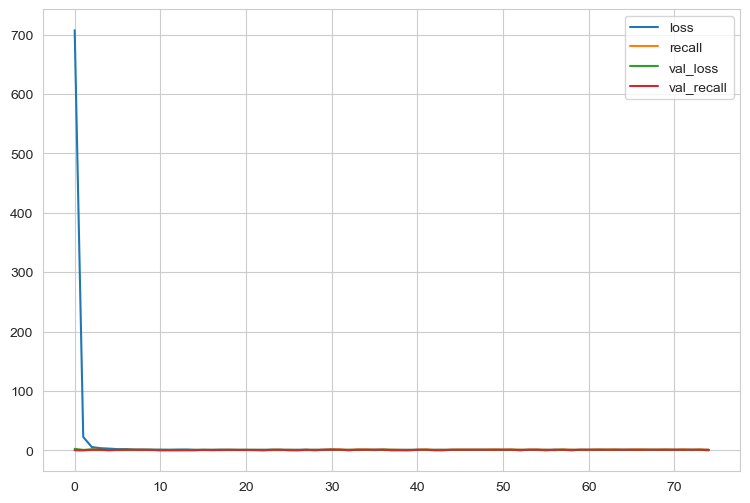

In [77]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [78]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[   0 1593]
 [   0  407]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1593
           1       0.20      1.00      0.34       407

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.17      2000
weighted avg       0.04      0.20      0.07      2000



## GridSearchCV

In [91]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, RMSprop, Adadelta, Nadam

In [97]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
    classifier.add(Dropout(0.2))

    classifier.add(Dense(16, activation="relu"))
    classifier.add(Dropout(0.2))

    classifier.add(Dense(8, activation="relu"))
    classifier.add(Dropout(0.2))

    classifier.add(Dense(1, activation="sigmoid"))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [98]:
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [99]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [100]:
classifier = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [64, 128],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight=class_weights)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Epoch 1/200
113/113 [==============================] - 3s 6ms/step - loss: 2836.2185 - recall: 0.6218 - val_loss: 35.4057 - val_recall: 0.0132
Epoch 2/200
113/113 [==============================] - 0s 4ms/step - loss: 261.5981 - recall: 0.3078 - val_loss: 0.6796 - val_recall: 0.0000e+00
Epoch 3/200
113/113 [==============================] - 0s 3ms/step - loss: 77.0646 - recall: 0.2057 - val_loss: 0.6784 - val_recall: 0.0000e+00
Epoch 4/200
113/113 [==============================] - 0s 4ms/step - loss: 38.9213 - recall: 0.1597 - val_loss: 0.6760 - val_recall: 0.0000e+00
Epoch 5/200
113/113 [==============================] - 0s 3ms/step - loss: 20.6796 - recall: 0.1143 - val_loss: 0.6734 - val_recall: 0.0000e+00
Epoch 6/200
113/113 [==============================] - 0s 3ms/step - loss: 9.3659 - recall: 0.1238 - val_loss: 0.6727 - val_recall: 0.0000e+00
Epoch 7/200
113/113 [==============================] - 0s 3ms/step - loss: 

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E065973790>,
             n_jobs=-1,
             param_grid={'batch_size': [64, 128],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [101]:
grid_model.best_score_

1.0

In [102]:
grid_model.best_params_

{'batch_size': 64,
 'learn_rate': 0.001,
 'optimizer': keras.optimizers.optimizer_v2.nadam.Nadam}

In [103]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
9,1.000,0.000,1,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
3,1.000,0.000,1,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
4,0.999,0.001,3,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
8,0.999,0.001,3,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
23,0.944,0.108,5,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
12,0.926,0.145,6,"{'batch_size': 128, 'learn_rate': 0.001, 'opti..."
0,0.878,0.220,7,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
15,0.861,0.278,8,"{'batch_size': 128, 'learn_rate': 0.001, 'opti..."
13,0.801,0.396,9,"{'batch_size': 128, 'learn_rate': 0.001, 'opti..."
19,0.800,0.399,10,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."


In [104]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1574   19]
 [ 407    0]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.79      2000
   macro avg       0.40      0.49      0.44      2000
weighted avg       0.63      0.79      0.70      2000



63/63 [==============================] - 0s 2ms/step


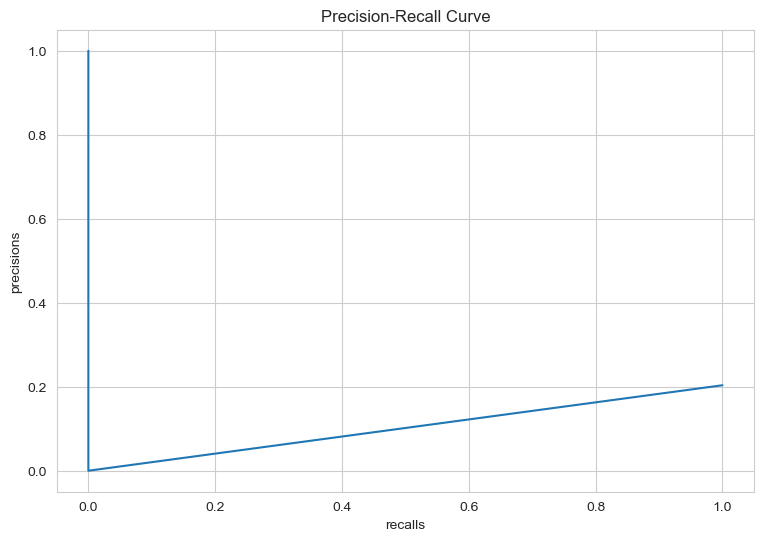

In [106]:
y_pred_proba = grid_model.predict(X_test)
precisions, recalls, tresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall Curve')
plt.show()

# Final Model and Model Deployment

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
opt = Nadam(lr=0.001)

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["recall"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
model.fit(X_train, 
               y_train,
               validation_data=(X_test, y_test)
               callbacks = [early_stop], 
               batch_size=64,
               epochs=200,
               verbose=1,
               class_weight=class_weights)

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
model.save('model_churn.h5')

## Prediction

In [ ]:
single_customer = df.drop('Exited', axis = 1).iloc[0:1, :]
single_patient

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___